# Intro

Welcome to the classifier training notebook!

To run this notebook, you must first have prepared images and labels. This can be done using the `labeling_interactive.ipynb` notebook, or can be provided manually.

The notebook proceeds as follows:
1. **Import** libraries
2. Define **paths** to data
3. **Train** a classifier
4. **Save** results

# Imports

In [1]:
# widen jupyter notebook window
from IPython.display import display, HTML
display(HTML("<style>.container {width:95% !important; }</style>"))

In [2]:
from pathlib import Path
import tempfile
import functools

import numpy as np
import sklearn

In [3]:
import roicat

# Data Importing

## Option 1: Use Data Results from Labeling Interactive Outputs

##### 1. Specify filepath

In [4]:
filepath_labellingInteractive = r'/scratch/719363/719363.ROICaT.classification_drawn.results.pkl'
labelingInteractive = roicat.helpers.pickle_load(filepath_labellingInteractive)

##### 2. Import data

Be sure to specify a `um_per_pixel`

In [5]:
labelingInteractive = roicat.helpers.pickle_load(filepath_labellingInteractive)

data = roicat.data_importing.Data_roicat();
data.set_ROI_images(
    ROI_images=[labelingInteractive['images'][labelingInteractive['labels']['index']]],
    um_per_pixel=0.78,
);
data.set_class_labels(
    [labelingInteractive['labels']['label']],
);

data.check_completeness()

KeyError: 'images'

In [6]:
labelingInteractive

{'preds': [array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
         1, 1, 1

Notice that `.check_completeness()` shows that `classification_training` is `True`

## Option 2: Make a new data object

See the [demo_data_importing](https://github.com/RichieHakim/ROICaT/blob/dev/notebooks/jupyter/other/demo_data_importing.ipynb) notebook to build a custom data object using any kind of data (Suite2p, CaImAn, etc.). It's really easy!

For example:
```
data = roicat.data_importing.Data_suite2p(
    paths_statFiles=['/path/to/stat.npy'],
    paths_opsFiles=['/path/to/ops.npy'],
    um_per_pixel=2.5,  
    new_or_old_suite2p='new',
    type_meanImg='meanImgE',
    verbose=True,
)
data.set_class_labels(path_labels=['/path/to/labels.npy'])
assert data.check_completeness(verbose=False)['classification_inference'], f"Data object is missing attributes necessary for tracking."
```

In [7]:
from suite2p_paths import load_plane_paths

dir_allOuterFolders = "/data"
planes = load_plane_paths(dir_allOuterFolders)
data = roicat.data_importing.Data_suite2p(
    paths_statFiles=[ p['stat_path'] for i,plane in planes.items() for p in plane  ],
    paths_opsFiles=[ p['ops_path'] for i,plane in planes.items() for p in plane  ],
    um_per_pixel=0.78,  
    new_or_old_suite2p='new',
    type_meanImg='meanImg',
    verbose=True,
)

data.set_class_labels(labels=labelingInteractive['preds'])

assert data.check_completeness(verbose=False)['classification_inference'], f"Data object is missing attributes necessary for tracking."

Starting: Importing FOV images from ops files
Completed: Set FOV_height and FOV_width successfully.
Completed: Imported 4 FOV images.
Completed: Set FOV_images for 4 sessions successfully.
Importing spatial footprints from stat files.


100%|██████████| 4/4 [00:00<00:00, 10.97it/s]


Imported 4 sessions of spatial footprints into sparse arrays.
Completed: Set spatialFootprints for 4 sessions successfully.
Completed: Created session_bool.
Completed: Created centroids.
Staring: Creating centered ROI images from spatial footprints...
Completed: Created ROI images.
Starting: Importing class labels
Labels and ROI Images match in shapes: Class labels and ROI images have the same number of sessions and the same number of ROIs in each session.
Completed: Imported labels for 4 sessions. Each session has [334, 308, 196, 149] class labels. Total number of class labels is 987.


# ROInet embedding

This step passes the images of each ROI through the ROInet neural network. The inputs are the images, the output is an array describing the visual properties of each ROI.

##### 1. Initialize ROInet

Initialize the ROInet object. The `ROInet_embedder` class will automatically download and load a pretrained ROInet model. If you have a GPU, this step will be much faster.

In [8]:
DEVICE = roicat.helpers.set_device(use_GPU=True, verbose=True)
dir_temp = tempfile.gettempdir()

roinet = roicat.ROInet.ROInet_embedder(
    device=DEVICE,  ## Which torch device to use ('cpu', 'cuda', etc.)
    dir_networkFiles=dir_temp,  ## Directory to download the pretrained network to
    download_method='check_local_first',  ## Check to see if a model has already been downloaded to the location (will skip if hash matches)
    download_url='https://osf.io/c8m3b/download',  ## URL of the model
    download_hash='357a8d9b630ec79f3e015d0056a4c2d5',  ## Hash of the model file
    forward_pass_version='head',  ## How the data is passed through the network
    verbose=True,  ## Whether to print updates
)

roinet.generate_dataloader(
    ROI_images=data.ROI_images,  ## Input images of ROIs
    um_per_pixel=data.um_per_pixel,  ## Resolution of FOV
    pref_plot=False,  ## Whether or not to plot the ROI sizes
);

Using device: cuda:0
File already exists locally: /tmp/ROInet.zip
Hash of local file matches provided hash_hex.
Extracting /tmp/ROInet.zip to /tmp.
Completed zip extraction.
Imported model from /tmp/ROInet_classification_20220902/model.py
Loaded params_model from /tmp/ROInet_classification_20220902/params.json


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ConvNeXt_Tiny_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Tiny_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Generated network using params_model


/opt/conda/lib/python3.10/site-packages/roicat/ROInet.py:396: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.net.load_state_dict(torch.load(paths_networkFiles['state_dic

Loaded state_dict into network from /tmp/ROInet_classification_20220902/ConvNext_tiny__1_0_unfrozen__simCLR.pth
Loaded network onto device cuda:0
Starting: resizing ROIs
Completed: resizing ROIs
Defined image transformations: Sequential(
  (0): ScaleDynamicRange(scaler_bounds=(0, 1))
  (1): Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
  (2): TileChannels(dim=0)
)
Defined dataset
Defined dataloader


##### 2. Check ROI_images sizes
In general, you want to see that a neuron fills roughly 25-50% of the area of the image. \
**Adjust `um_per_pixel` above to rescale image size**


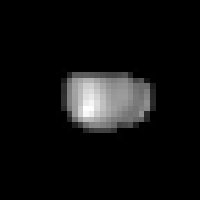

In [9]:
roicat.visualization.display_toggle_image_stack(roinet.ROI_images_rs[:1000], image_size=(200,200))

##### 3. Pass data through network

Pass the data through the network. Expect for large datasets (~40,000 ROIs) that this takes around 15 minutes on CPU or 1 minute on GPU.

In [10]:
roinet.generate_latents();

starting: running data through network


100%|██████████| 124/124 [00:04<00:00, 30.51it/s]


completed: running data through network


# Train / Validation / Test Split Data, Hyperparameter Tune on Validation Set, and Fit Model

Prepare input data

In [11]:
X = np.array(roinet.latents).astype(np.float32)
y = np.concatenate(data.class_labels_index).astype(np.int64)

##### Initialize the **AutoClassifier**. 

This class is meant to be easy to use, but advanced users will find all the parameters they might want to play with available as arguments. Feel free to play with some of them by looking through the detailed [**DOCUMENTATION**](https://roicat.readthedocs.io/en/latest/roicat.html#roicat.classification.classifier.Auto_LogisticRegression) on this class. Here's a brief tutorial:
- This class performs classification by fitting a Logistic Regression model
- There is one critical parameter in this model: ``'C'``. Lowering 'C' means more regularization.
- This class will **automatically tune** any parameter that is specified in the `params_LogisticRegression` argument as a list of values. See the sklearn documentation on [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for the full list of arguments that can be specified in ``params_LogisticRegression``.
    - Examples: 
    ```
    ## Initialize with NO TUNING. All parameters are fixed.
    autoclassifier = Auto_LogisticRegression(
        X,
        y,
        params_LogisticRegression={
            'C': 1e-14,
            'penalty': 'l2',
            'solver': 'lbfgs',
        },
    )

    ## Initialize with TUNING 'C', 'penalty', and 'l1_ratio'. 'solver' is fixed.
    autoclassifier = Auto_LogisticRegression(
        X,
        y,
        params_LogisticRegression={
            'C': [1e-14, 1e3],
            'penalty': ['l1', 'l2', 'elasticnet'],
            'l1_ratio': [0.0, 1.0],
            'solver': 'lbfgs',
        },
    )
    ```

In [19]:
autoclassifier = roicat.classification.classifier.Auto_LogisticRegression(
    X=X,
    y=y,
    params_LogisticRegression={
        'C': [1e-13, 1e3],
    },
    verbose=True,
)

##### Run the AutoClassifier

In [20]:
autoclassifier.fit()

[I 2024-07-11 23:54:23,897] A new study created in memory with name: Autotuner


  0%|          | 0/150 [00:00<?, ?it/s]

[I 2024-07-11 23:54:23,942] Trial 0 finished with value: 28549.82602851463 and parameters: {'C': 676.8788010689781}. Best is trial 0 with value: 28549.82602851463.
[I 2024-07-11 23:54:23,961] Trial 1 finished with value: 0.08383284684167062 and parameters: {'C': 1.302688713321863e-08}. Best is trial 1 with value: 0.08383284684167062.
[I 2024-07-11 23:54:23,974] Trial 2 finished with value: 10557.3429929907 and parameters: {'C': 0.11400343767165656}. Best is trial 1 with value: 0.08383284684167062.
[I 2024-07-11 23:54:23,987] Trial 3 finished with value: 0.44294009326169964 and parameters: {'C': 1.2309472511351843e-10}. Best is trial 1 with value: 0.08383284684167062.
[I 2024-07-11 23:54:23,999] Trial 4 finished with value: 3914.367218764271 and parameters: {'C': 2.097834901625361}. Best is trial 1 with value: 0.08383284684167062.
[I 2024-07-11 23:54:24,025] Trial 5 finished with value: 0.14654000071205456 and parameters: {'C': 9.85110225031336e-06}. Best is trial 1 with value: 0.083832

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(LogisticRegression(C=8.221646690651073e-05,
                    class_weight={0: 8.972727272727273, 1: 0.5295064377682404}),
 {'C': 8.221646690651073e-05})

# Visualize results

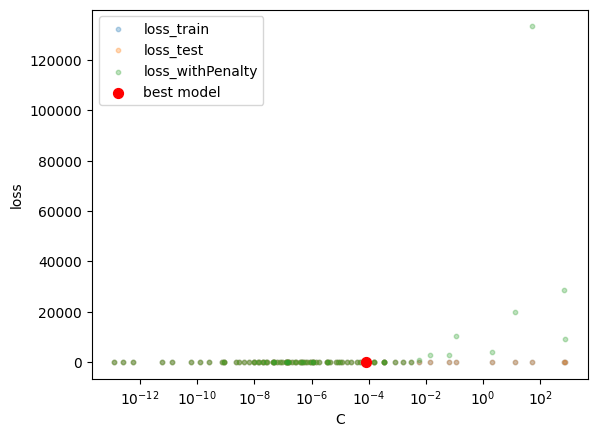

In [21]:
autoclassifier.plot_C_curve()

Accuracy: 1.0


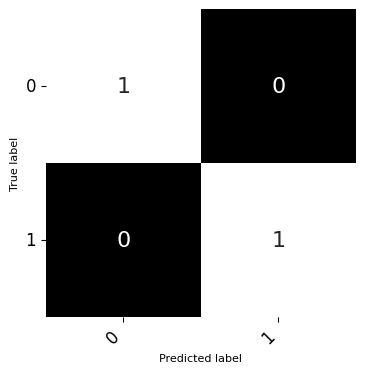

In [22]:
accuracy, confusion_matrix = autoclassifier.evaluate_model()

print(f"Accuracy: {accuracy}")

roicat.visualization.plot_confusion_matrix(
    confusion_matrix=confusion_matrix,
    class_names=None,
)

# Save Outputs

In [23]:
directory_save = '/scratch/'
filename_prefix_model = 'SYT'

autoclassifier.save_model(
    filepath=str(Path(directory_save) / (filename_prefix_model + '.ROICaT.classification_training.model' + '.onnx')),
    allow_overwrite=False
)

roicat.helpers.pickle_save(
    obj=autoclassifier.serializable_dict,
    filepath=str(Path(directory_save) / (filename_prefix_model + '.ROICaT.classification_training.autoclassifier' + '.pkl')),
)